#Importando da base de dados

In [29]:
#Arquivo desenvolvido com base nas orientação da Sthe Monica (Instrutora da Alura)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.express import box

In [30]:
data = pd.read_json('Telco-Customer-Churn-limpeza.json')
data.head()

,customerID,Churn,Genero,MelhorIdade,Conjuge,Dependentes,MesesContrato,ServicoTelefonico,MultiplosTelefones,ServicoInternet,...,TechSupport,StreamingTV,StreamingMovies,TipoContrato,TipoDaFatura,FormaDePagamento,Cobranca.Mes,Cobranca.Total,GastoDiario30Dias,GastoDiario365Dias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667,2.156712
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667,1.969315
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333,2.429589
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667,3.221918
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667,2.758356


#Analisando Churn

In [31]:
# Para analisar as features que são categóricas, podemos usar include

data.describe(include=[object])

#O nosso método .describe() retornou 3 linhas diferentes das que já conheciamos:
#    >> unique é a quantidade de valores únicos
#    >> top é o valor mais comum
#    >> freq é a frequência do valor mais comum

,customerID,Churn,Genero,Conjuge,Dependentes,ServicoTelefonico,MultiplosTelefones,ServicoInternet,SergurancaOnline,BackupOnline,ProtecaoDevice,TechSupport,StreamingTV,StreamingMovies,TipoContrato,TipoDaFatura,FormaDePagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


#Análises Gráficas

##**Distribuição da variável Churn**

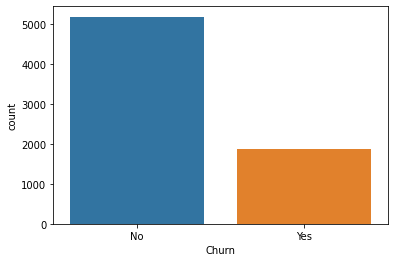

In [32]:
sns.countplot(x='Churn',data=data)

In [33]:
total_Contrato_Cancelado = len(data[(data.Churn == 'Yes')])
total_Contrato_Ativo = len(data[(data.Churn == 'No')])

print('Visualmente podemos identificar que a quantidade de contratos ativos é maior que os contratos cancelados.')
print('São {} contratos ativos e {} contratos cancelados.'.format(total_Contrato_Ativo,total_Contrato_Cancelado))

Visualmente podemos identificar que a quantidade de contratos ativos é maior que os contratos cancelados.
São 5174 contratos ativos e 1869 contratos cancelados.


*Tendo uma visão geral dos contratos cancelados (Churn), vamos analisar se o "gênero" influencia nessa variável.*

##**Distribuição da variável gênero por Churn**

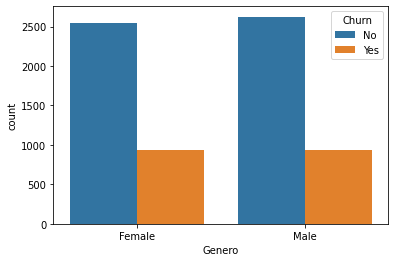

In [34]:
sns.countplot(x='Genero',data=data,hue='Churn')

*Visualmente, podemos identificar que a variável "gênero" não possui impacto no churn, uma vez que a proporção de pessoas que cancelaram o serviço entre os genêros é a mesma.*

In [35]:
total_Chur_Homem = len(data[(data.Churn == 'Yes') & (data.Genero == 'Male')])
total_Chur_Mulheres = len(data[(data.Churn == 'Yes') & (data.Genero == 'Female')])

In [36]:
print('Sendo assim, dos contratos cancelados {} são mulheres e {} são homens.'.format(total_Chur_Mulheres,total_Chur_Homem))

Sendo assim, dos contratos cancelados 939 são mulheres e 930 são homens.


In [37]:
# Vamos validar se percentualmente (%) as mulheres cancelam mais ou menos que os homens

total_Contratos = len((data.Churn))

total_Homens = len(data[(data.Genero == 'Male')])
percentual_Chur_Homens = round(total_Chur_Homem*100/total_Homens)

total_Mulheres = len(data[(data.Genero == 'Female')])
percentual_Chur_Mulheres = round(total_Chur_Mulheres*100/total_Mulheres)

print('{}% das mulheres cancelaram o contrato (Churn).'.format(percentual_Chur_Mulheres))
print('{}% dos homens cancelaram o contrato (Churn).'.format(percentual_Chur_Homens))

27% das mulheres cancelaram o contrato (Churn).
26% dos homens cancelaram o contrato (Churn).


*Como visto acima o percentual entre os gêneros é praticamente igual (1 ponto percentual de diferença), confirmando que a variável "gênero" não impacta no churn.*

##**Distribuição da variável Serviços de Internet por Churn**

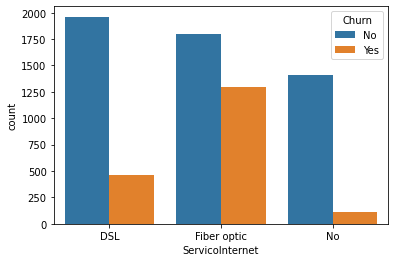

In [38]:
#vamos plotar os gráfico com os serviços de internet

sns.countplot(x='ServicoInternet',data=data,hue='Churn')

*Conseguimos identificar visualmente, que os cliente com "Fiber optic" possuem uma taxa de churn proporcionalmente maior que os demais.*

##**Distribuição da variável Segurança Online por Churn**

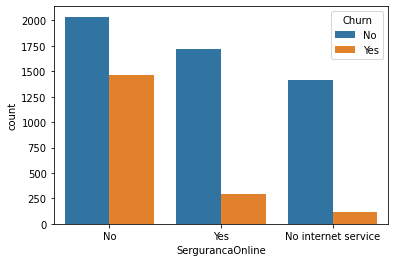

In [39]:
# Plotando o gráfico referente a se o cliente possui segurança online ou não

sns.countplot(x='SergurancaOnline',data=data,hue='Churn')

*Visualmente conseguimos identificar que os cliente que NÃO TEM o serviço de segurança on line possuem uma taxa de churn maior que os demais.*

##**Distribuição da variável Online Backup por Churn**



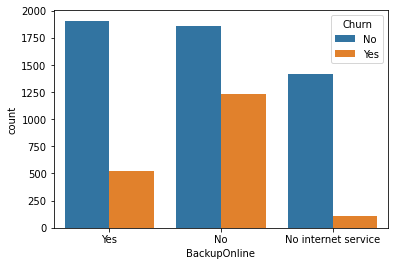

In [40]:
# Plotando o gráfico referente a se o cliente possui ou não um backup online

sns.countplot(x='BackupOnline',data=data,hue='Churn')

*Visualmente conseguimos identificar que os cliente que NÃO TEM o serviço de backup on line possuem uma taxa de churn maior que os demais.*

Sendo assim oferecer os serviços de Segurança e Backup Online da Alura Voz seria uma possibilidade para reduzir a taxa de churn.

##**Distribuição da variável DeviceProtection por Churn**

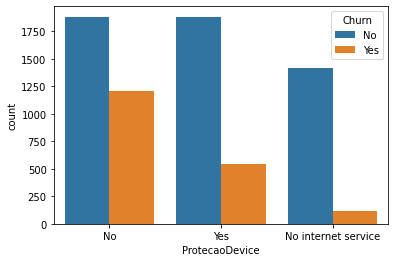

In [41]:
# Plotando o gráfico referente a se o cliente possui proteção do dispositivo ou não

sns.countplot(x='ProtecaoDevice',data=data,hue='Churn')

*Mais uma vez conseguimos identificar que os cliente que NÃO TEM o serviço de proteção do device possuem uma taxa de churn maior que os demais.*

##**Distribuição da variável TechSupport por Churn**

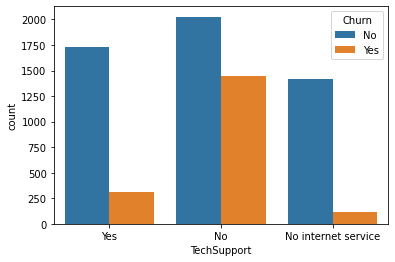

In [42]:
# Plotando o gráfico referente a se o cliente tem suporte técnico ou não.

sns.countplot(x='TechSupport',data=data,hue='Churn')

*Clientes que não possuem suporte técnico tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de suporte técnico é uma boa opção para reduzir a taxa de cancelamentos.

##**Distribuição da variável Contract por Churn**

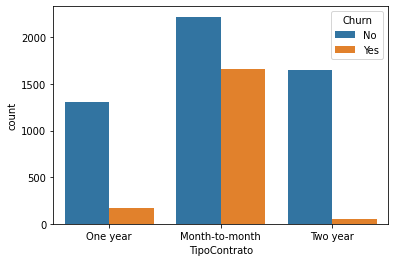

In [43]:
# Plotando o gráfico referente ao prazo do contrato do cliente

sns.countplot(x='TipoContrato',data=data,hue='Churn')

*Pelo gráfico acima temos que os clientes que possuem um contrato mensal são os que tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de contrato anual ou de dois anos é uma boa opção para reduzir a taxa de cancelamentos.*

##Distribuição da variável Forma de Pagamento por Churn

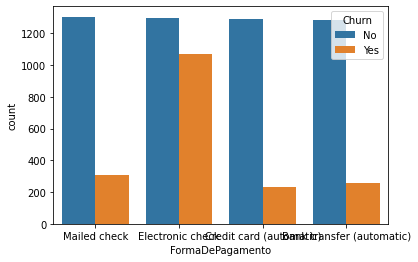

In [44]:
# Plotando o gráfico referente ao método de pagamento do cliente

sns.countplot(x='FormaDePagamento',data=data,hue='Churn')

*Percebemos que as pessoas utilizam o método de pagamento "Eletronic check" tendem a cancelar os serviços da Alura Voz. Direcionar os clientes para outro método de pagamento é uma boa opção para reduzir a taxa de cancelamentos.*

##**Distribuição da variável Melhor Idade por Churn**





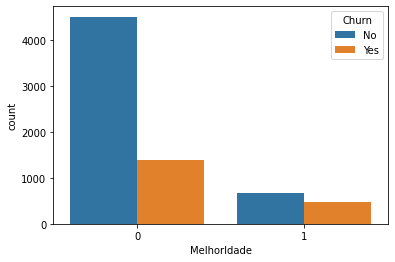

In [45]:
# Plotando o gráfico a se o cliente é idoso ou não por churn

sns.countplot(x='MelhorIdade',data=data,hue='Churn')

*Apesar da quantidade de clientes idosos ser menor, a proporção de clientes que cancelaram o serviço entre os idosos é maior que a de clientes que não são idosos.*

*Entender os motivos que estão levando a essa taxa de cancelamento entre os idosos e adotar medidas para melhorar o serviço para esses clientes é uma boa opção para reduzir a taxa de cancelamento.*

#Análise Gráfica 2

In [46]:
# Imprimindo boxplot com o plotly

for col in ['MesesContrato', 'Cobranca.Mes']:
    fig = box(data, x=col, color='Churn', orientation='h')
    fig.show()

*Analisando a feature "Meses de contrato", que representa o tempo de contrato do cliente, percebe-se que clientes que estão a mais tempo tendem a continuar a utilizar o serviço.*

*Para a feature "Charges.Monthly", percebe-se que os clientes que adquirem serviços mais baratos tendem a continuar utilizando o serviço.*
